In [281]:
import requests
import bs4
import re
import pandas as pd

In [747]:
data = [
        {'EPISODE_NUM': '', 
         'EPISODE_NAME': '', 
         'HOST_NAME':'',
         'START_YEAR': '',
         'END_YEAR': '',
         'START_MONTH': '',
         'END_MONTH': '',
         'MAIN_COUNTRY': '',
         'MAIN_COUNTRY_ALPHA2' : '',
         'MAIN_CITY': '',
         'COORD_LAT': '',
         'COORD_LONG': '',
         'COORD_ID': ''
        }]

In [73]:
result = requests.get("https://www.zeitsprung.fm/podcast/zs122/")
result.encoding = 'utf-8'
soup = bs4.BeautifulSoup(result.text,"html.parser")

In [77]:
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" lang="de-DE">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="https://gmpg.org/xfn/11" rel="profile"/>
  <title>
   ZS122: Die Belagerung von Masada - Zeitsprung
  </title>
  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots">
   <link href="https://www.zeitsprung.fm/podcast/zs122/" rel="canonical">
    <meta content="de_DE" property="og:locale">
     <meta content="article" property="og:type"/>
     <meta content="ZS122: Die Belagerung von Masada - Zeitsprung" property="og:title"/>
     <meta content="Wir springen in dieser Episode ins 1. Jahrhundert n.d.Zw.. Ort des Geschehens ist die Provinz Judäa. Die römische Provinz ist instabil und nach einem eigentlich kleinen Steuerprotest, entladen sich die Spannungen in einem Aufstand, der als der Große Jüdische Krieg in die Geschichte eingehen sollte. Wir sprechen über den Schl

In [154]:
title = soup.select("title")[0].getText()
title

'ZS122: Die Belagerung von Masada - Zeitsprung'

In [153]:
description = soup.p.getText()
description

'Wir springen in dieser Episode ins 1. Jahrhundert n.d.Zw. Ort des Geschehens ist die Provinz Judäa. Die römische Provinz ist instabil und nach einem eigentlich kleinen Steuerprotest, entladen sich die Spannungen in einem Aufstand, der als der Große Jüdische Krieg in die Geschichte eingehen sollte.'

In [186]:
img_str = soup.find_all('meta')[18]
img_url = re.findall(r'"([^"]*)"', str(img_str))[0]
img_url

'https://www.zeitsprung.fm/wp-content/uploads/2018/01/ZS122Masada.jpg'

In [184]:
author_str = soup.find_all('span')[14]
author_name = re.findall(r'>([^"]*)</a', str(author_str))[0]
author_name

'Richard'

In [229]:
tag_str = soup.find_all('a')
tag_list = re.findall(r'rel="tag">([^"]*)</a', str(tag_str))

In [140]:
pattern = r'"([A-Za-z0-9_\./\\-]*)"'
re.search(pattern, str(img_url))

In [180]:
author_str

<span class="meta-text"> Von <a href="https://www.zeitsprung.fm/author/richard/">Richard</a> </span>

In [145]:
re.findall(r'"([^"]*)"', str(img_url))[0]

'https://www.zeitsprung.fm/wp-content/uploads/2018/01/ZS122Masada.jpg'

In [748]:


data= []


for i in range(1,265+1):
    
    title = ''
    author_name = ''
    tags = ''
    img_url = ''
    
    dummy = [{'EPISODE_NUM': '', 
         'EPISODE_NAME': '', 
         'AUTHOR':'',
         'START_YEAR': '',
         'END_YEAR': '',
         'START_CENTURY': '',
         'END_CENTURY': '',
         'MAIN_COUNTRY': '',
         'MAIN_COUNTRY_ALPHA2' : '',
         'MAIN_CITY': '',
         'COORD_LAT': '',
         'COORD_LONG': '',
         'COORD_ID': '',
         'URL': '',
         'DESCRIPTION': '',
         'TAGS': ''
        }]

    
    
    if i < 10:
        num = '0'+str(i)
    else:
        num = str(i)

    
    # download site
    url = 'https://www.zeitsprung.fm/podcast/zs'+num+'/'
    result = requests.get(url)
    result.encoding = 'utf-8'
    soup = bs4.BeautifulSoup(result.text,"html.parser")
    
    #get info
    try:
        title = soup.select("title")[0].getText()
        title = re.findall(r':([^"]*) - Zeitsprung', str(title))[0]
        print(f">> {num}: {title}")
    except:
        print(f"\t ERROR: title download failed")
        title = ''
    finally:
        pass
    
    try:
        description = soup.p.getText()
    except:
        print(f"\t ERROR: description download failed")
        description = ''
    finally:
        pass
    
    
    try:
        author_str = soup.find_all('span')[14]
        author_name = re.findall(r'>([^"]*)</a', str(author_str))[0]
    except:
        print(f"\t ERROR: author name download failed")
        author_name = ''
    finally:
        pass
    
    try:
        tag_str = soup.find_all('a')
        tag_list = re.findall(r'rel="tag">([^"]*)</a', str(tag_str))
        tags = ','.join(map(str, tag_list))
    except:
        print(f"\t ERROR: author name download failed")
        tags = ''
    finally:
        pass
    

    
    dummy[0].update({'EPISODE_NUM': i})
    dummy[0].update({'EPISODE_NAME': title})
    dummy[0].update({'AUTHOR': author_name})
    dummy[0].update({'DESCRIPTION': description})
    dummy[0].update({'TAGS': tags})
    dummy[0].update({'IMG_URL': img_url})
    dummy[0].update({'URL': url})
    
    data.append(dummy[0])
    


        
    
    

df = pd.DataFrame(data) 

df.to_csv('../data/'+'dump.csv', sep='\t', encoding='utf-8',index=False)      
        

>> 01:  Vier Langobarden-Könige und ein Trinkbecher
>> 02:  Tatortschau mit Wiedererkennungswert
>> 03:  Fitness-Parcours für den Pharao
>> 04:  Wellingtons Rache, oder: Ein Bein für ein Königreich
>> 05:  Lernen Sie Geschichte!
>> 06:  Ada und die Pferdewetten
>> 07:  Geteilte Habsburger
>> 08:  Herr der Fliegen
>> 09:  Wer den englischen Parlamentsbrand auf dem Kerbholz hat
>> 10:  Craigslist in der Frühen Neuzeit
>> 11:  Von Kindern und Kegeln
>> 12:  Ein Kaiser, ein Gott, viele Todesfälle
>> 13:  Ein Spionagefall erschüttert die Habsburger Monarchie
>> 14:  Ein englisches Atlantis
>> 15:  Das Mailüfterl
>> 16:  Ton, Steine, Scherben oder wie Rom sich einen achten Hügel baute
>> 17:  Eine Urkunde, ein Zeltlager und eine Fälschung
>> 18:  Wie Russland den Bart verlor
>> 19:  Wenn ein Wissenschaftler an Drachen glaubt
>> 20:  Von Drachenknochen und Schildkrötenorakeln
>> 21:  Von der Erfindung der Einbauküche
>> 22:  Vom Goldjungen zum Staatsgefangenen
>> 23:  Ziemlich beste Feindscha

>> 158:  Al-Biruni und die erste Globalgeschichte
>> 159:  Thorsten Logge über Geschichte und Public History
>> 160:  Barbareskenstaaten und die europäischen Seemächte
>> 161:  Steamboat Arabia oder Der Schatz im Maisfeld
>> 162:  Novemberrevolution und die mehrfache Ausrufung der Republik
>> 163:  Vernepator Cur - der Hund im Hamsterrad
>> 164:  Eine kurze Geschichte des Alkoholkonsums
>> 165:  Pius IX. und die kurzlebige Römische Republik von 1849
>> 166:  Siegmund Bosel – die wechselvolle Geschichte eines Inflationskönigs
>> 167:  Mary Toft und die Hasen
>> 168:  Carl Laemmle und die Anfänge Hollywoods
>> 169:  Maos Großer Sprung und die chinesische Hungersnot von 1958–62
>> 170:  Auf Schatzsuche
>> 171:  Eine ganz kleine Geschichte der Nacht und des Schlafs
>> 172:  Eine kurze Geschichte der Armut in der Frühen Neuzeit
>> 173:  Der gefährliche Garten von Vaux-le-Vicomte
>> 174:  Harriet Tubman und die Underground Railroad
>> 175:  C.W. Field und das erste Kabel durch den Atlantik
>

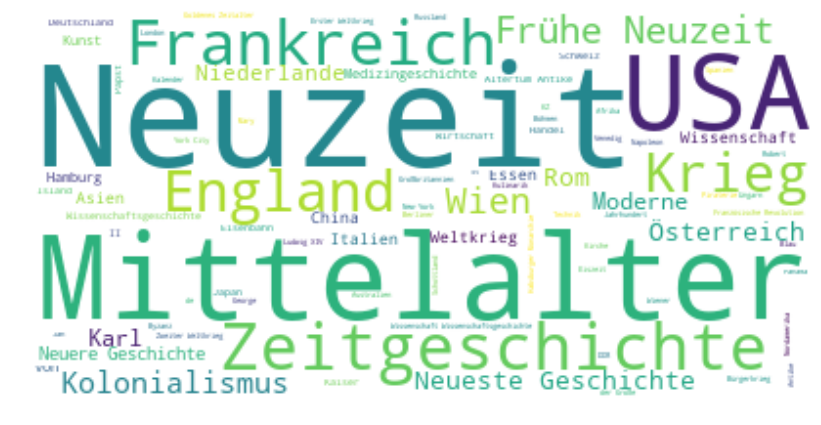

In [751]:
# tag word cloud
from wordcloud import WordCloud, STOPWORDS
import itertools
import matplotlib.pyplot as plt

tag_list = []

for index, row in df.iterrows():
        
    tag_list.append(df["TAGS"][index])
    
tag_string = ''

for n in range(0,len(tag_list)):
    tag_string += tag_list[n]+','
    
tag_string.replace(',',' ')



stopwords = set(STOPWORDS)

zeitsprung_wc = WordCloud(
    background_color='white',
    max_words=2500,
    stopwords=stopwords
)

# generate the word cloud
zeitsprung_wc.generate(tag_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(zeitsprung_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


    

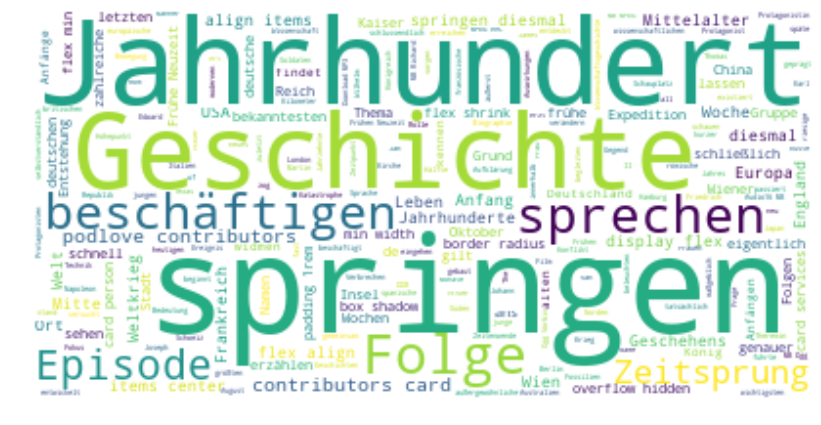

In [629]:
with open("../data/stopwords-de.txt", "r") as f:
    new_stopwords = []
    for line in f.read().splitlines():
        new_stopwords.append(line)

stopwords_ger = set(new_stopwords)


tag_list = []

for index, row in df.iterrows():
        
    tag_list.append(df["DESCRIPTION"][index])
    
tag_string = ''

for n in range(0,len(tag_list)):
    tag_string += tag_list[n]+','
    
tag_string.replace(',',' ')



stopwords = set(STOPWORDS)

zeitsprung_wc = WordCloud(
    background_color='white',
    max_words=2500,
    stopwords=stopwords_ger
)

# generate the word cloud
zeitsprung_wc.generate(tag_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(zeitsprung_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [818]:

# guess episode year from descripton text
import pandas as pd


pd.options.mode.chained_assignment = None



df = pd.read_csv("../data/dump.csv", na_filter=False, sep='\t')

year_flag = False




for index, row in df.iterrows():
    text = df["DESCRIPTION"][index]
    text_tags = df["TAGS"][index]
    year_list = []
    century_list = []
    
    for match_year in re.finditer(r"\d\d\d\d",text):
          
        if int(match_year.group()) < 2020:
            year_list.append(match_year.group())
        
    
        century = int(match_year.group()) // 100 + 1
        century_list.append(int(century))

        
    for match_century in re.finditer(r"\d\d. Jahrhundert",text):
        
        century_str = match_century.group()
        century_int = int(century_str.split(". Jahrhundert",1)[0])
        century_list.append(century_int)
        
    for match_century in re.finditer(r" \d. Jahrhundert",text):
        
        century_str = match_century.group()
        century_int = int(century_str.split(". Jahrhundert",1)[0])
        century_list.append(century_int)

# TAGS---------------------------------------------------
    
    for match_year in re.finditer(r"\d\d\d\d",text_tags):
          
        if int(match_year.group()) < 2020:
            year_list.append(match_year.group())
        
    
        century = int(match_year.group()) // 100 + 1
        century_list.append(int(century))       
        
    
    for match_century in re.finditer(r"\d\d. Jahrhundert",text_tags):
        
        century_str = match_century.group()
        century_int = int(century_str.split(". Jahrhundert",1)[0])
        century_list.append(century_int)
        
    for match_century in re.finditer(r" \d. Jahrhundert",text_tags):
        
        century_str = match_century.group()
        century_int = int(century_str.split(". Jahrhundert",1)[0])
        century_list.append(century_int)        
        
        

    
    
    
    century_list = list(set(century_list))
    century_list.sort()
    
    year_list = list(set(year_list))
    year_list.sort()
    
    #print(f"{df['EPISODE_NUM'][index]} - {year_list} - {century_list}")
          
          
    #print(len(year_list))
    # assign min year and max year to df          
    if len(year_list) > 0:
        df["START_YEAR"][index] = year_list[0]
        df["END_YEAR"][index] = year_list[-1]
    if len(century_list) > 0:
        df["START_CENTURY"][index] = century_list[0]
        df["END_CENTURY"][index] = century_list[-1]
        

df.to_csv('../data/'+'dump_years.csv', sep='\t', encoding='utf-8',index=False)    

In [819]:
# guess country
# liste runtergeladen. muss in data folder und geladen werden

import googletrans
from googletrans import Translator
import pycountry

translator = Translator()

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2


df_countries = pd.read_csv("../data/countries_german-iso-3166.csv")
df = pd.read_csv("../data/dump_years.csv", na_filter=False, sep='\t')

country_list = []
tags_list = []

# create country
for index, row in df_countries.iterrows():
    country_list.append(df_countries["Country"][index])

country_list.append('England')
country_list.append('USA')
#country_list.append('Korea')

# compare description or tags with list
for index, row in df.iterrows():
    
    found_countries = []
    found_countries_en = []
    code_list = []
    description_str = str(df["DESCRIPTION"][index])
    tags_str = str(df["TAGS"][index])
    a = tags_str.replace(',',', ')
    
    for n in country_list:
        if n in description_str:
            country_en = translator.translate(str(n), src='de', dest='en')
            found_countries_en.append(country_en.text)
            code_list = [countries.get(country, 'Unknown code') for country in found_countries_en]

    #for n in country_list: 
        if n in tags_str:
            country_en = translator.translate(str(n), src='de', dest='en')
            found_countries_en.append(country_en.text)
            code_list = [countries.get(country, 'Unknown code') for country in found_countries_en]
            
    
    found_countries_en = list(set(found_countries_en))
    code_list = list(set(code_list))
    
    
    df["MAIN_COUNTRY"][index] = ', '.join(found_countries_en)
    df["MAIN_COUNTRY_ALPHA2"][index] = ', '.join(code_list)
    
df.to_csv('../data/'+'dump_years_countries.csv', sep='\t', encoding='utf-8',index=False)   

    

In [820]:
df


,EPISODE_NUM,EPISODE_NAME,AUTHOR,START_YEAR,END_YEAR,START_CENTURY,END_CENTURY,MAIN_COUNTRY,MAIN_COUNTRY_ALPHA2,MAIN_CITY,COORD_LAT,COORD_LONG,COORD_ID,URL,DESCRIPTION,TAGS,IMG_URL
0,1,Vier Langobarden-Könige und ein Trinkbecher,Daniel,,,,,Italy,IT,,,,,https://www.zeitsprung.fm/podcast/zs01/,Frühes Mittelalter in Italien: Times are rough...,"Alboin,Byzanz,Langobarden,Mittelalter,Ost-Rom",
1,2,Tatortschau mit Wiedererkennungswert,Daniel,1900,1900,20,20,,,,,,,https://www.zeitsprung.fm/podcast/zs02/,Wir springen diesmal nicht ganz so weit zurück...,"1900,Bertillon,Daktyloskopie,Fingerabdruck,Kri...",
2,3,Fitness-Parcours für den Pharao,Daniel,,,,,Egypt,EG,,,,,https://www.zeitsprung.fm/podcast/zs03/,"Wer regieren will, muss fit sein? Aber wie läs...","Ägypten,Altertum,Antike,Pharao",
3,4,"Wellingtons Rache, oder: Ein Bein für ein Kön...",Daniel,,,,,"France, England","Unknown code, FR",,,,,https://www.zeitsprung.fm/podcast/zs04/,Wir springen in die Zeit der napoleonischen Kr...,"England,Frankreich,Napoleon,Neuzeit,Waterloo,W...",
4,5,Lernen Sie Geschichte!,Daniel,1981,1981,20,20,,,,,,,https://www.zeitsprung.fm/podcast/zs05/,Wir springen nur wenige Jahrzehnte zurück in d...,"Kreisky,Zeitgeschichte",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,261,"Adam Worth, der Napoleon des Verbrechens",Daniel,,,19,19,,,,,,,https://www.zeitsprung.fm/podcast/zs261/,Wir springen ins 19. Jahrhundert und beschäfti...,,
261,262,Die Strawhat Riots,Richard,1922,1922,20,20,USA,Unknown code,,,,,https://www.zeitsprung.fm/podcast/zs262/,"Wir springen in dieser Folge ins Jahr 1922, Or...","Hüte,USA,Zeitgeschichte",
262,263,Lavoisier und die Entdeckung des Sauerstoffs,Daniel,1770,1770,18,18,,,,,,,https://www.zeitsprung.fm/podcast/zs263/,Wir springen ins 18. Jahrhundert und beschäfti...,,
263,264,"Seondeok, erste Königin Koreas",Richard,,,7,7,,,,,,,https://www.zeitsprung.fm/podcast/zs264/,Wir springen in dieser Folge ins 7. Jahrhunder...,"Asien,Korea,Mittelalter",
